# Lecture 5: Statistics for Data Science

## 3/15/21

### Table of Contents
1. [Counting](#count)
2. [Probability](#prob)
3. [Random Variables](#rv)
4. [Expectation and Variance](#expvar)  
5. [Binomial Distribution](#binomial)
6. [Density Functions](#density)
7. [Normal Distribution](#normal)
8. [References/Resources](#ref)

### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu/). Authored by [Jessica Wang]( jessicawang7201@berkeley.edu) and [Jade Pan](jpan4@araj@berkeley.edu).

### Presented by Jade Pan and Gilbert Feng (Spring 2022).

In [3]:
# initial
# Setup code
import seaborn as sns
import csv
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

<a id='count'></a>
# Counting

**Permutation**: the ordered arrangement of k items out of a list of n. Calculated using the formula $_nP_k = \frac{n!}{(n-k)!}$ or use the built in function: <br><br>`scipy.special.perm(n,k,exact = False)` *(when exact = false, any floats are rounded to the nearest integer)*<br><br>For example, you and 4 other friends (Kate, Minh, Edlyn, Derek) are visiting Imm Thai for the first time. There are 6 different entrees you can order from the menu (Pad Thai, Pad Se Ew, Chicken Curry, Duck Curry, Noodle Soup, Fried Rice). You each want to order a different dish. Permutation is the different ordered arrangement you guys can pick.<br><br> Do you think order matters in this case? Why?

**Question:** write out some permutations for Imm Thai example <br>
*answer here* <br>
**Question:** use the formula or function provided above, calculate the permutation. What is n? What is k? <br>
*answer here*

In [4]:
scipy.special.perm(6,4)

360.0

**Combination**: all possible groupings of k items out of a list of n. Calculated using the formula $_nC_k = \frac{n!}{(n-k)!k!}$ or using the built in function: <br><br> `scipy.special.comb(n,k,exact = False, repetition = False)` *(when repetition = True, each element can be used more than one time)*<br><br>
For example, the education committee needs to choose a group of 2 people to design and present the next CX lecture. Combination is the different possible groups we can choose. <br><br>
Does order matter in this case? Why?

**Question:** The education committee include: Chinmay, Derek, Frank, Jade, Jasmine, Jessica, Leah, Minh, Ritvik, Robert, Zaid. Write out some lecturer combinations for the next CX lecture. <br>
*answer here* 
<br> **Question:** Use the formula or function provided above, calculate the combination? What is n? What is k?

In [5]:
scipy.special.comb(11,2)

55.0

[Here](https://youtu.be/p8vIcmr_Pqo) is a helpful video that shows how to derive the formulas for permutation and combination.

<a id='prob'></a>
# Probability

How do you define probability?


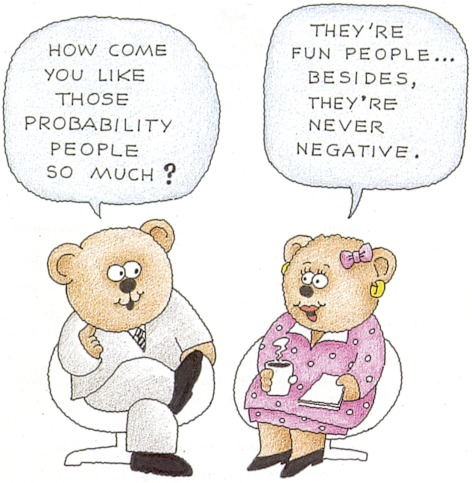

One definition is the branch of mathematics that calculates, estimates, or simulates the likelihood of a given event. In today's lesson we will explore various probability properties, definitions, and distributions.

## Adding
**Mutually Exclusive**: Given two events, at most one can occur. Both events cannot occur simultaneously.

Examples: 
<ol>
<li>Flipping heads or tails in one coin toss</li>
<li>Getting an even or odd number in one roll of a die</li>
<li>Drawing a face card or number card from a standard deck of 52 cards</li>
<li><b>Fill this in with your own example</b></li>
</ol>


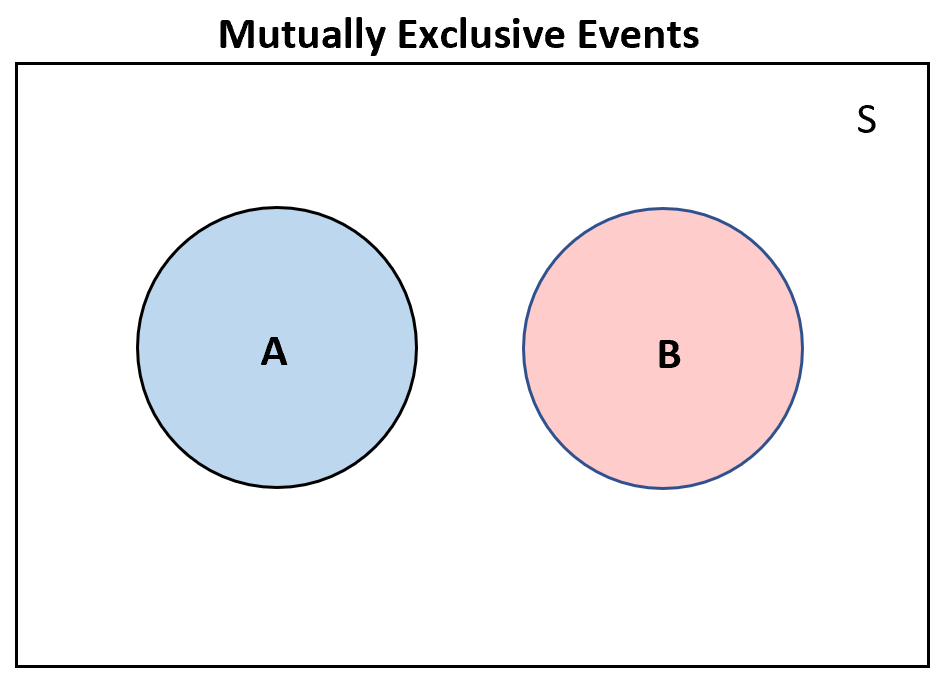

**Addition Rule**: If two events $A$ and $B$ are mutually exclusive, then the probability that either event will occur (the **union** of $A$ and $B$) is the sum of the probabilities that each individual event will occur, so $P(A \cup B) = P(A) + P(B)$.

**Exercise**: In the cell below, calculate the probability that either you draw a face card or a number card. 

**Hint**: A standard deck of 52 cards has 4 suites and each suite has 3 face cards (King, Queen, and Jack) and 9 number cards (2 through 10).

In [6]:
prob_face_card = 12/52
prob_number_card = 36/52
prob_face_or_number = prob_face_card + prob_number_card
prob_face_or_number

0.9230769230769231

The Addition Rule can be expanded to multiple events, as long as they are all mutually exclusive. 

Given $n$ mutually exclusive events $A_1, A_2, ... , A_n$, then:

$$P(\bigcup_{i=1}^{n}A_i) = \sum_{i=1}^{n}P(A_i)$$

**Question**: What happens when two events $A$ and $B$ are ***not*** mutually exclusive? 

This means there is a nonzero probability that both events occur, which is the **intersection** of $A$ and $B$. We denote this as the $P(A\cap B)$, which is often written as $P(A$ and $B)$ or $P(AB)$. The intersection is represented by the shaded region in the figure below.

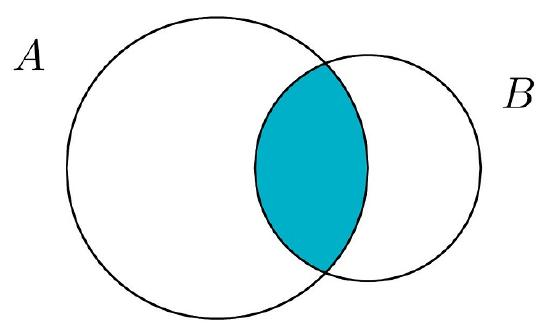

In order to calculate the probability that either $A$ or $B$ occurs, we have to subtract the intersection of the two events otherwise we count this probability twice. This means that $P(A\cup B) = P(A) + P(B) - P(A \cap B)$.

**Exercise**: Suppose we randomly choose a CX member from the list of 11 names below. Calculate the probability that we choose either a name with more than 5 letters or a name with 2 syllables.
 - **List of CX members**: 
- Aisha
- Amber
- Chris
- Claire
- Daisy
- Garrett
- James
- Joe
- Sarah
- Selena
- Venkata


In [7]:
prob_more_than_5 = 4/11
prob_2_syllables = 5/11
prob_both = 1/11
prob_either = prob_more_than_5 + prob_2_syllables - prob_both
prob_either

0.7272727272727272

**Inclusion-Exclusion Principle**: The calculation of the union of events can also be extended to multiple, not necessarily mutually exclusive events. 

Given $n$ events $A_1, A_2, ... , A_n$, then:

$$P(\bigcup_{i=1}^{n}A_i) = \sum_{i=1}^{n}P(A_i) - \sum_{1\leq{i}<}\sum_{j\leq{n}}P(A_iA_j) + \sum_{1\leq{i}<}\sum_{j<k}\sum_{\leq{n}}P(A_iA_jA_k) - ... + (-1)^{n+1}P(A_1A_2...A_n)$$

This formula looks complicated but it's just the result of including the probabilities of all events, excluding intersections of two events, including intersections of three events, exlcuding intersections of four events, etc.

Check out this cool [matching problem](http://prob140.org/textbook/content/Chapter_05/03_The_Matching_Problem.html) using Inclusion-Exclusion.

**Complement**: Given an event $A$, the complement of $A$ (denoted by $A^C$) is the probability that $A$ does ***not*** happen. Since the total probability adds up to one, this means that $P(A^C) = 1 - P(A).$

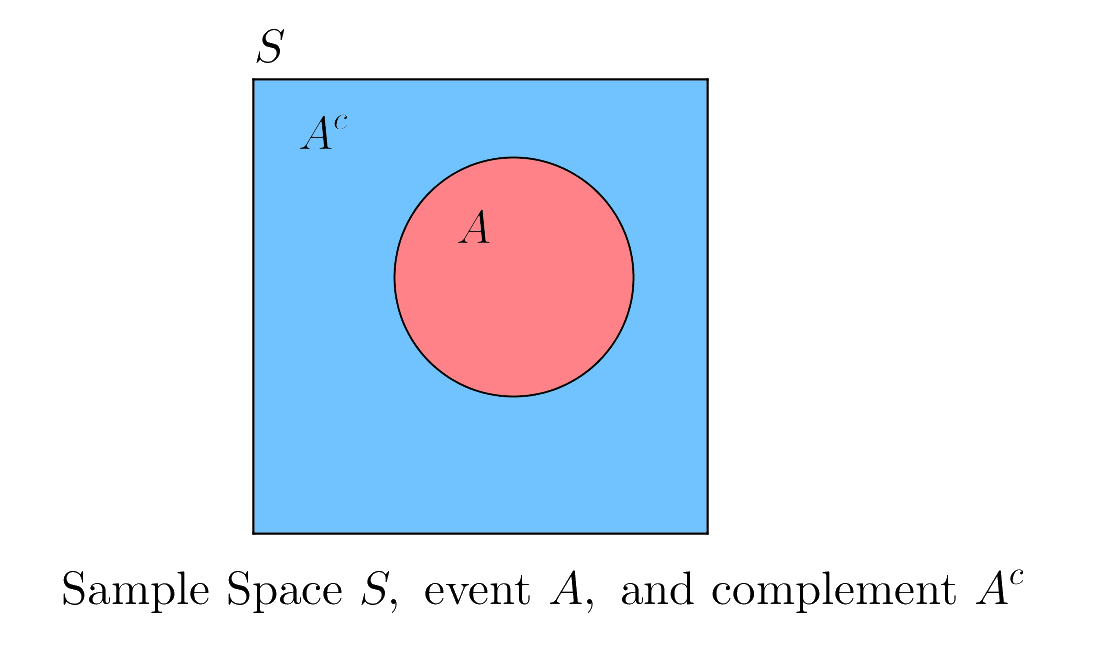

**Note**: Sometimes, calculating the probability of the complement of an event is easier than calculating the probability of the event. In the example from earlier of calculating the probability of drawing either a face card or a number card, we might notice that Ace is the only card that is not a face or number card. 

**Exercise**: In the cell below, calculate the probability of ***not*** drawing an Ace.

In [8]:
prob_ace = 4/52
prob_not_ace = 1 - prob_ace
prob_not_ace

0.9230769230769231

Compare this with the probability we calculated before using the Addition Rule:

In [9]:
prob_face_or_number

0.9230769230769231

## Multiplication

**Conditional Probability**: Suppose we have two events, $A$ and $B$. The conditional probability of $A$ given $B$, denoted as $P(A | B)$, is the probability that $A$ occurs, given that $B$ has already occurred. We calculate this with the following formula: $$P(A | B) = \frac{P(A\text{ and }B)}{P(B)}$$

**Multiplication Rule**: The probability that both $A$ and $B$ occur can be calculated using conditional probability as defined above. 

$$P(AB) = P(A | B) * P(B)$$

**Exercise**: How would you calculate $P(AB)$ using $P(B | A)$? Replace the question mark with your answer below.

$$P(AB) = P(B | A) * ?$$

**Independence**: $A$ and $B$ are independent if $P(A|B) = P(A)$. This means that the outcome of $B$ does not affect the outcome of $A$ and vice versa. Using the Multiplication Rule, we can see that $P(AB) = P(A) * P(B)$

**Exercise**: Using the complement rule and independence, calculate the probability that in 10 rolls of a fair die, at least one 6 is rolled.

In [10]:
prob_no_sixes = (5/6)**10
prob_at_least_one_6 = 1 - prob_no_sixes
prob_at_least_one_6

0.8384944171101543

<a id='rv'></a>
# Random Variables
So far, we have been referring to events such as $A$ and $B$ but have not formally defined them as variables.

**Random Variable**: A numerical function defined on an outcome space.

In the example below, our random variable $X$ represents the toss of a coin where the outcome space is $\{H, T\}$.

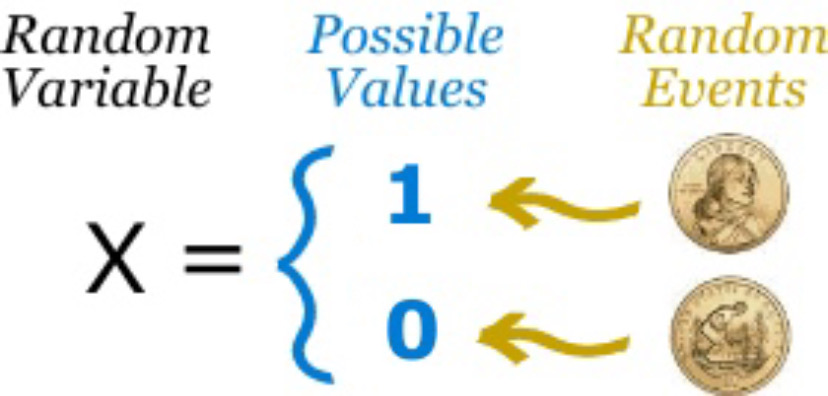

**Note**: If the probability that the coin lands as heads is $p$ and the probability that the coin lands as tails is $1-p$, then $X$ has a **Bernoulli(p)** distribution. One toss of a fair coin has a $Bernoulli(.5)$ distribution. Rolling a 6 vs. any other number on a fair die has a $Bernoulli(1/6)$ distribution.


The code below gives us the outcome space of two tosses of a coin.

In [11]:
from itertools import product
one_toss = np.array(['H', 'T'])
two_tosses = list(product(one_toss, repeat=2))
two_tosses

[('H', 'H'), ('H', 'T'), ('T', 'H'), ('T', 'T')]

<a id='expvar'></a>
# Expectation and Variance
**Expectation**: The expected value of a random variable $X$ is the average of the possible values weighted by each respective probability. 

$$E(X) = \sum_{\text{all } x}xP(X=x)$$

For a $Bernoulli(p)$ variable $X$, we have the following possible values and their corresponding probabilities:

| Possible Values | Probability |
| -----------     | ----------- |
| 1               | $p$         |
| 0               | $1-p$       |

So the calculation of the expectation of $X$ is $E(X) = 1*P(X=1) + 0*P(X=0) = 1(p) + 0(1-p) = p$.

**Exercise**: What is the expected value of rolling a fair die? Use the cell below for calculations if you need it.

In [12]:
# Use this cell to calculate the expectation of rolling a fair die
expected_val = np.mean(np.arange(1,7))
expected_val

3.5

The code below simulates 10,000 rolls of a fair die and calculates the mean. Compare this to your expected value.

In [13]:
die_rolls = []
for i in range(10000): # Try changing the number of rolls to see what happens
    one_roll = np.random.randint(1, 7)
    die_rolls.append(one_roll)
np.mean(die_rolls)

3.5122

The expectation of a random variable can be thought of as the long run average value of independently generated values of the variable.

**Linearity of Expectation**
<ol>
<li>The expected value of a constant is itself. So given a constant $c$, $E(c) = c$.</li>
<li>Expectation is <b>additive</b>. This means that for two random variables $X$ and $Y$, $E(X+Y) = E(X) + E(Y)$ </li>
</ol>

When we combine these two properties, we get the linearity of expectation.

For some constant $c$ and random variables $X$ and $Y$: $$E(cX+Y) = c*E(X) + E(Y)$$.

Note that there are no assumptions about $X$ and $Y$, they could be independent or dependent.

**Exercise**: Given $E(X) = 9$ and $E(Y) = 4$, replace the question mark with the answer to the equation below.

$$E(2X-3Y+6) = ?$$


**Variance**: The variance of a random variable $X$ (often denoted as $\sigma_{x}^2$) is the expected value of the square of deviations from the mean. 

$$Var(X) = \sigma_{x}^{2} = E((X-E(X))^2)$$ 

Let $E(X) = \mu_x$ then we have:

$$Var(X) = \sigma_{x}^{2} = E((X-\mu_x)^2)$$ 


**Standard Deviation**: The standard deviation of $X$ (often denoted as $\sigma_{x}$) is simply the square root of the variance. This puts the standard deviation in the same units as $X$ and $E(X)$. 

$$\sigma_x = \sqrt{E((X-\mu_x)^2)}$$


**Properties of Variance and Standard Deviation**
<ol>
<li>Given a constant c, $Var(cX) = c^2Var(X) = c^2\sigma_{x}^2$.</li>
<li>For standard deviation, $SD(cX) = |c|SD(X) = |c|\sigma_x$. </li>
<li>Shifts do not affect variance since the values are still the same in relation to each other. So for a constant $b$, $Var(X + b) = Var(X) = \sigma_{x}^2$.</li>
<li>Similarly for standard deviation, $SD(X + b) = SD(X) = \sigma_x$</li>
    
</ol>

**Exercise**: Using properties we have learned so far, calculate $Var(X)$ in terms of $E(X)$ and $\mu_{x}^2$.

Check your answer [here](http://prob140.org/textbook/content/Chapter_12/01_Definition.html#computational-formula-for-variance).

<a id='binomial'></a>
# Binomial Distribution

Earlier we defined the $Bernoulli(p)$ distribution. The binomial distribution is an extension of the Bernoulli distribution and finds the probability of $k$ successes in $n$ independent Bernoulli trials each with probability $p$ of success.

If a random variable $X$ has a $binomial(n, p)$ distribution, then:

$$P(X=k) = {n \choose k}p^k(1-p)^{n-k}$$ 


**Exercise**: Find the probability that you get exactly 7 heads in 15 tosses of a biased coin where $p = .25$.

**Hint**: Feel free to use `scipy.special.comb(n, k)`. Documentation is linked [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html)

In [14]:
prob_7_H = scipy.special.comb(15, 7) * (.25)**7 * (.25)**8
prob_7_H

5.993060767650604e-06

Now calculate this exercise using `stats.binom.pmf(k, n, p).` Documentation is linked [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

In [15]:
prob_7_H = stats.binom.pmf(7, 15, .25)
prob_7_H

0.0393204716965556

<a id='density'></a>
# Density Function

Given $x$ is a continuous random variable, probability density function $f(x)$ represents the probability of outcome being equal to a particular $x$ value. <br><br>
$f$ must be a non-negative function on the real number line and $$
\int_{-\infty}^\infty f(x)dx ~ = 1
$$

**Example**<br>
Assume Jade's lecture performance is a continuous variable from 0 to 1. Her performance follows the probability density function below:
<br>
$$
f(x) = 
\begin{cases}
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \le 0 \\
6x(1-x) ~~~~~ \text{if } 0 < x < 1 \\
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \ge 1 \\
\end{cases}
$$

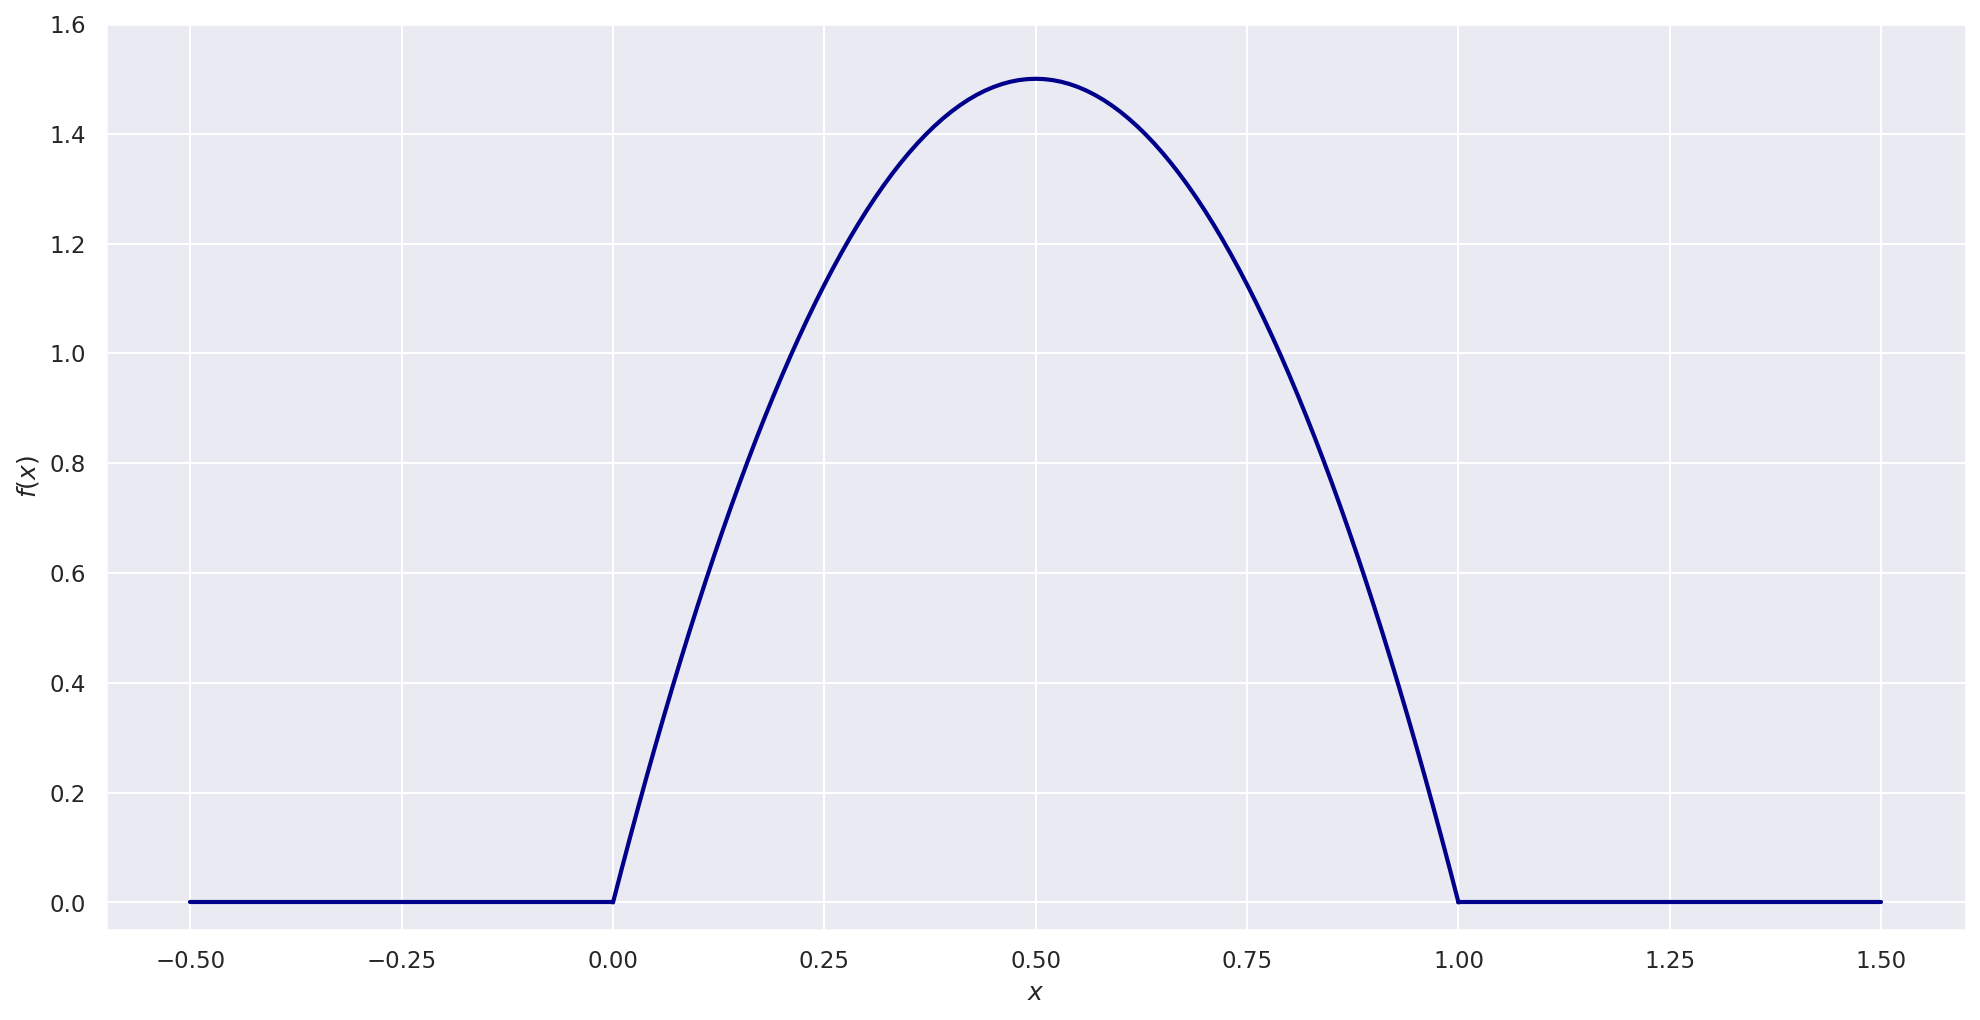

In [16]:
#graph of f(x)
def f(x):
    return 6*x*(1-x)

x = np.arange(0, 1.01, 0.01)
plt.plot(x, f(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.ylim(-0.05, 1.6)
plt.xlabel('$x$')
plt.ylabel('$f(x)$');

### Density is Not the Same as Probability ###
In the example above, $f(0.5) = 6/4 = 1.5 > 1$. Indeed, there are many values of $x$ for which $f(x) > 1$. So the values of $f$ are clearly not probabilities. It does not mean that Jade has a 1.5 probability of getting $0.5/1$.

The focus of probability density graphs is the area under the curve and not the height of the curve itself. The area under the density curve represents the probability.

To calculate the probability of Jade getting a score between 0.5 and 0.75, we can use the area under the density curve from 0.5 to 0.75. Given $f(x) = 6x(1-x)$ for $0 < x < 1$, we can find the area by taking the integral $\int_{0.5}^{0.75} f(x)dx$ = $0.34375$ <br>
This means Jade has a roughly 0.34 chance of getting a score between 0.5 and 0.75.

<img src='0.5-0.75.jpg' style='width: 300px'></img>

**Question:** why do all probability density functions have to follow $\int_{-\infty}^\infty f(x)dx ~ = 1$ ? <br>
*answer here*
<br>**Question:** why does the probability density function have to be a postive function? <br>
*answer here*

**Check-in question:**<br>
Can this function be a density function? Why? <br>
$f(x) = 0.5x$ for $0 < x < 8$
<br> How about this one? <br>
$f(x) = x-2$ for $0 < x < 3$

### Cumulative Distribution Function or CDF ###

The cumulative distribution function is $F(x) = f(X\le x)$ where $f(x)$ is the probability density function. In other words, $F(x)$ is equal to the probability of the random variable outcome being less than or equal to a particular x value.

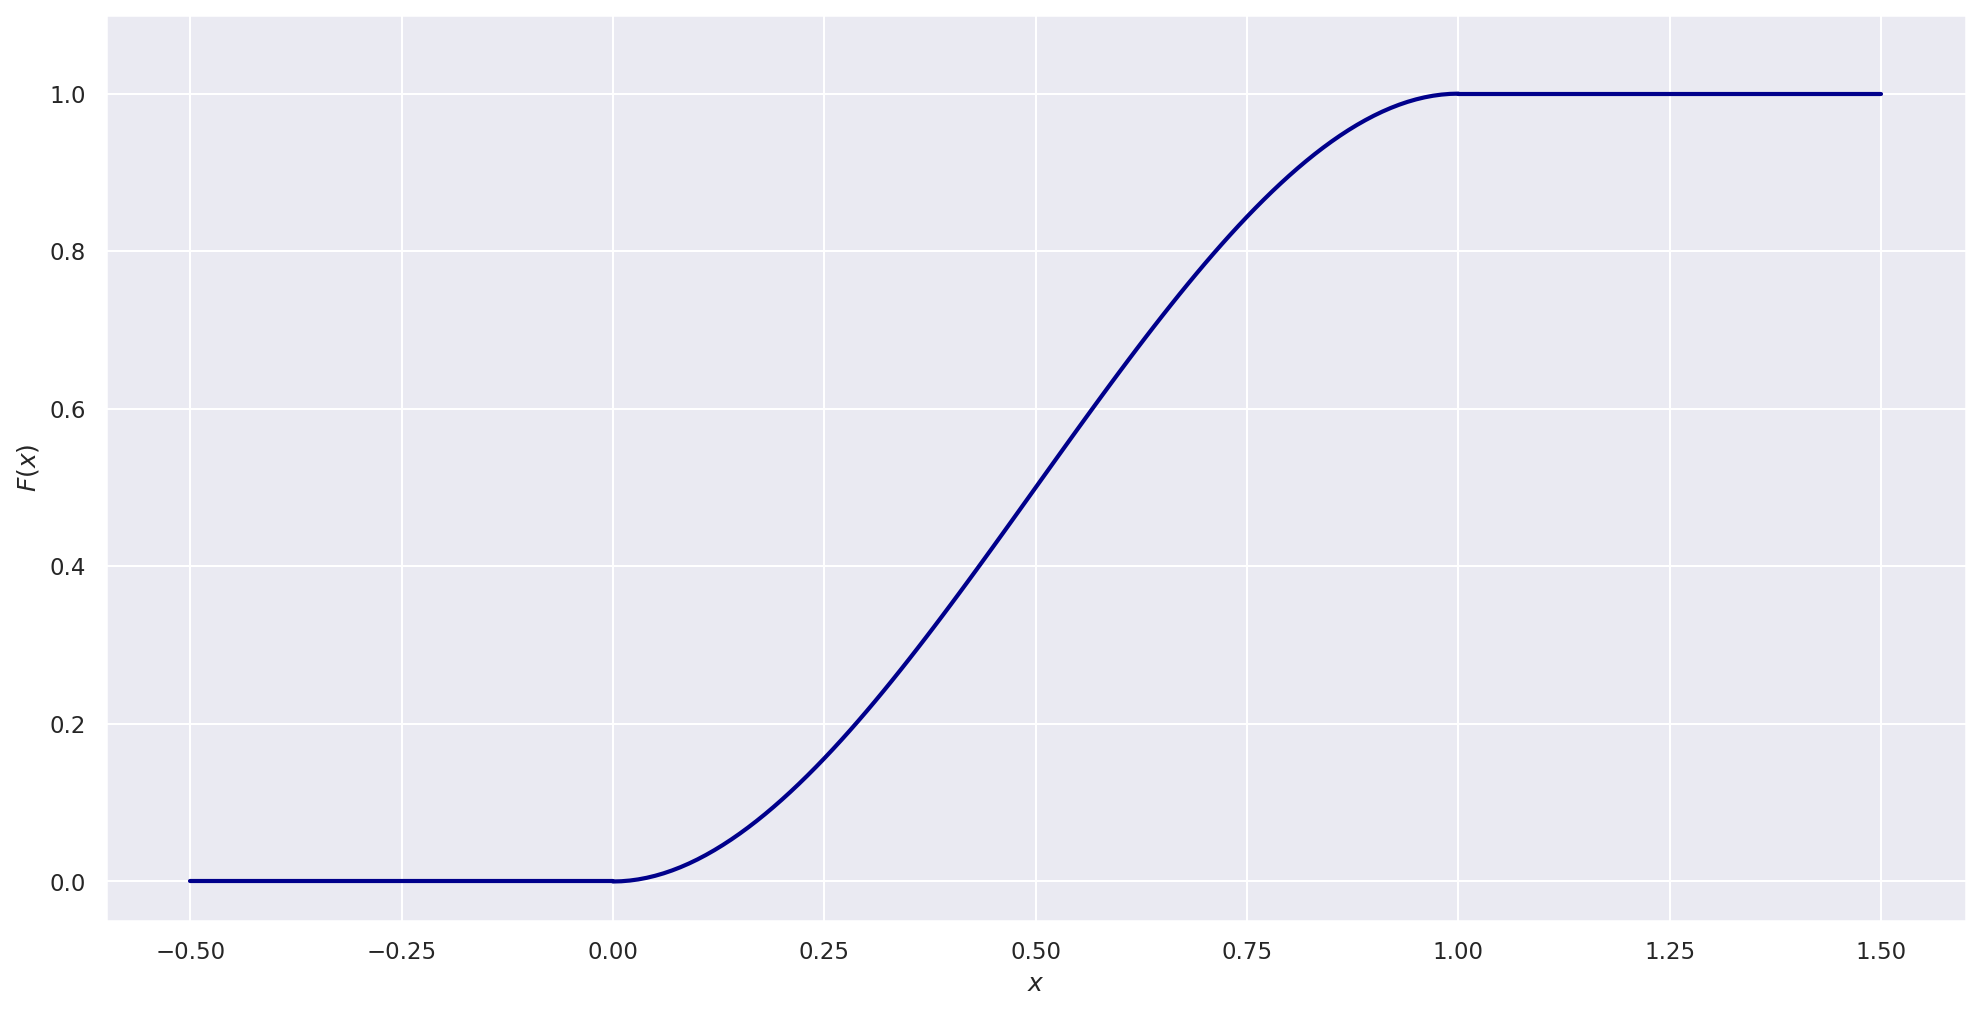

In [26]:
def f2(x):
    return -(x**2)*(2*x-3)-(-(0**2)*(2*-0-3))

x = np.arange(0, 1.01, 0.01)
plt.plot(x, f2(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [1, 1], color='darkblue', lw=2)
plt.ylim(-0.05, 1.1)
plt.xlabel('$x$')
plt.ylabel('$F(x)$');

This graph shows that Jade has a roughly 0.85 chance of getting a score of 0.75. We can compute the exact value using the cdf function we created.

In [27]:
f2(0.75)

0.84375

The CDF only tells us the chance of Jade getting a score of x, such as 0.75, or lower. How do we use CDF function to estimate the chance of Jade getting a score between two numbers?

**Question:** What is the probability that Jade gets a score between 0.5 and 0.75? We went over the answer using an integral previously, but how can we use this cdf formula to get that same number?

In [29]:
#code here
f2(0.75)-f2(0.5)

0.34375

Notice the cdf flattens out at F(x) = 1. Why is that? What is the maximum value for F(x)?

<a id='normal'></a>
# Normal Distribution

The probability density for the Gaussian or normal distribution is

$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation, $\sigma^2$ , is called the variance. The area under a normal curve is always 1. 

The function has its peak at the mean, and its “spread” increases with the standard deviation. The normal distribution is useful for the Central Limit Theorem which will be covered in a later lecture. 

The standard normal distribution has a mean of 0, and standard deviation of 1. We can convert any normal distribution to the standard normal distribution by calculating the z scores.

<img src='normal1.png' style='width: 300px'></img>

One convenient characteristic of the normal distribution is the 68 - 95 - 99.7 rule

<img src='normal3.png' style='width: 300px'></img>

Let's test out this rule on the standard normal distribution. 

`stats.norm(mu,sigma).cdf(x)` will give you the CDF of x where all x are follow a normal distribution with mean of mu and standard deviation of sigma.

What are the parameters for a standard normal distribution? <br>

What does it mean when I type in `stats.norm(0,1).cdf(0)`? What should the answer be?

In [33]:
#your code here
stats.norm(0,1).cdf(0)

0.5

Now, let's test out the 68-95-99.7 rule

In [32]:
#your code here
stats.norm(0,1).cdf(2)-stats.norm(0,1).cdf(-2)

0.9544997361036416

**Question:** assume the class midterm average follows a normal distribution with mean of 65 and standard deviation of 10. What is the score range for the middle 95% scores? <br>
*answer here*
<br> **Question** Jade scored 85 points. What percent of the class scored better than her? <br> How about if she scored 74 points?
*answer here*

In [36]:
#your code here
1 - stats.norm(65,10).cdf(85)
1 - stats.norm(65,10).cdf(74)

0.18406012534675953

<a id='ref'></a>
# Resources

[Stat140 Textbook](http://prob140.org/textbook/content/README.html)